In [44]:
import numpy as np
import sympy as smp
from sympy.functions import conjugate
from scipy.integrate import nquad
import matplotlib.pyplot as plt


An electron is initially prepared in a quantum mechanical state with zero average momentum and a
wavefunction given by

$$\psi(x, t=0) \propto e^{-x^2 / 2a^2}$$

The potential everywhere is zero. A detector is positioned at distance $x = L$ from the electron’s initial position.

1. After approximately how long is the electron likely to have passed the detector?
2. Find the probability of observing the electron past $x = L$ as a function of time.


## Part 1: approximate solution to the problem

We can obtain an estimate by computing $\left<p^2\right>$ from the wavefunction and then using the classical estimation $p = mv = mL/t$ where $t$ is the time to get to the detector. This gives

$$t = \frac{mL}{\sqrt{\left<p^2\right>}}$$

(Of course, since the particle starts with zero average momentum, it can only have at most a 50% chance of passing the detector). We just need to compute $\left< p^2 \right>$, given by

$$\left< p^2 \right> = \int_x dx \psi \hat{p}^2 \psi = \int_{-\infty}^{\infty} \psi \left(-\frac{d^2}{dx^2} \psi\right) dx$$

In [45]:
x = smp.symbols('x',real=True)
a,L,m,k,kp,t = smp.symbols('a L m k k_p t',real=True,positive=True)

In [46]:
# define the wave function and normalize it 
psi = smp.exp(-x**2/(2*a**2))
psi = smp.exp(-x**2/(2*a**2))/smp.sqrt(smp.integrate(psi**2,(x,-smp.oo,smp.oo)))

In [47]:
psi

exp(-x**2/(2*a**2))/(pi**(1/4)*sqrt(a))

In [48]:
# let's compute the expectation value of <p^2>

p2 = smp.integrate(psi*(-smp.diff(psi,(x,2))),(x,-smp.oo,smp.oo))
p2

1/(2*a**2)

In [49]:
# the time to reach detector 

T = m *L/smp.sqrt(p2)
T

sqrt(2)*L*a*m

## Part2, using the time dependent wave function

Above was simply an approximation. The wavefunction changes in time according to the Schrodinger Equation, which, in the position basis is given by:

$$i \frac{\partial}{\partial t} \psi(x,t) = H \psi(x,t)$$

where $H = -\frac{1}{2m}\frac{d^2}{dx^2}$ is the Hamiltonian linear operator for a particle in free space. The general solution to this equation is given by

$$\psi(x,t) = e^{i H t} \psi(x,t=0)$$

where $e^{A} \equiv \sum_{n=0}^{\infty} \frac{A^n}{n!}$. Since we know $\psi(x,t=0)$ and we know $H$, we essentially have the solution! It's just not in a convenient form. If we can express $\psi(x,t=0)$ in terms of the eigenstates of $H$ as $\psi(x,0) = \int_E dE c(E) \psi_E(x)$, then the solution is 

$$\begin{align} 
\psi(x,t) &= e^{i H t} \psi(x,t=0)\\
&= e^{i H t} \int_E dE c(E) \psi_E(x)\\ 
&= \int_E dE c(E) e^{i E t} \psi_E(x)\\
\end{align}$$

For this we need the eigenvalues and eigenstates of $H$. For this, we use $H = -\frac{1}{2m}\frac{d^2}{dx^2}$ and search for eigenstates:

$$\begin{align} 
H\psi &= E\psi\\
-\frac{1}{2m}\frac{d^2}{dx^2} \psi &= E\psi\\
\frac{d^2}{dx^2} \psi &= -2mE \cdot \psi\\
\end{align}$$

Our characteristic length scale of the problem is $a$, so multiplying this equaiton by $a$ and redefining $x$ such that $x\to x/a$, we get

$$\frac{d^2}{dx^2} \psi = -2mE a^2 \cdot \psi$$

We know that $E>0$ (free particle); thus $2mE a^2>0$. Thus we can write the equation above as $\frac{d^2}{dx^2} \psi = -k^2 \psi$, which is an equation that has a well known solution: $\psi_k = e^{i k x}$. Furthermore, this function forms a complete basis when considering all positive and negative values of $k$. Note that $k^2 = 2mE a^2$. We can now write

$$\psi(x,0) = \int_E dE c(E) \psi_E(x) = \int_{-\infty}^{\infty} dk c(k) e^{ikx}$$

So the $c(k)$'s are just the inverse Fourier transform of $\psi(x,0)$:

$$c(k) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \psi(x,0) e^{-ikx} dx $$

We have all the information to find these. First lets redefine $\psi$ using $x \to x/a$

In [50]:
# deine the normalized wave function 
psi = smp.exp(-x**2/(2))
psi = psi/ (smp.sqrt(smp.integrate(psi**2,(x,-smp.oo,smp.oo))))
psi

exp(-x**2/2)/pi**(1/4)

In [51]:
# define psi_k and c_k 
psi_k = smp.exp(smp.I*k*x)
c_k = 1/(2*smp.pi) * smp.integrate(psi*psi_k.conjugate(),(x,-smp.oo,smp.oo)).simplify()

In [52]:
# let's see we an get the orginal wave function back 
smp.integrate(c_k*psi_k,(k,-smp.oo,smp.oo)).simplify()


exp(-x**2/2)/pi**(1/4)

Now we have all the information and can express our wave function as 

$$\psi(x,t) = \int_E dE c(E) e^{i E t} \psi_E(x) = \int_{-\infty}^{\infty} dk c(k) e^{i k^2 t / 2m} \psi_k(x)$$

In principle, we can compute this integral numerically as we have access to all this information. Now for the task at hand. What's the probabilty of the particle being found beyond $x=L$ as a function of time? This is simply

$$\begin{align}p(t) &= \int_{L}^{\infty} |\psi(x,t)|^2 dx\\
&= \frac{1}{2}\left(1 - \int_{-L}^{L} |\psi(x,t)|^2 dx\right) 
\end{align}$$

We just need to solve that integral, which can be expanded as

$$\int_{-L}^{L} |\psi(x,t)|^2 dx = \int_{-L}^{L} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} dx dk dk' c(k) e^{i k^2 t/2m} \psi_k(x) c^{*}(k') e^{-i k'^2 t/2m} \psi^{*}_k(x)$$

If you try to evaluate this triple integral on a computer, it might take a very long time. We should always look for ways to simplify mathematical expressions analytically before plugging them into a computer. In this case, we can simplify this expression. Note that $\psi_k(x) = e^{ikx}$, so integration over $x$ is easy to do

$$\int_{-L}^{L} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} dx dk dk' c(k) e^{i k^2 t/2m} \psi_k(x) c^{*}(k') e^{-i k'^2 t/2m} \psi^{*}_k(x) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} dk dk' \left(\int_{-L}^{L} e^{i(k-k')x} dx \right) c(k) c^{*}(k')e^{i (k^2-k'^2) t/2m} $$



In [53]:
c_kp_c = c_k.subs(k,kp).conjugate()
psi_kp_c = psi_k.subs(k,kp).conjugate()

In [54]:
c_kp_c


sqrt(2)*exp(-k_p**2/2)/(2*pi**(3/4))

In [55]:
psi_kp_c

exp(-I*k_p*x)

In [56]:
# let's do the spatial integral part first 
r = smp.integrate(psi_k*psi_kp_c,(x,-L,L))
r = r.rewrite(smp.sin).simplify().rewrite(smp.sinc).simplify()

In [57]:
r

2*L*sinc(L*(k - k_p))

In [58]:
integrand = c_k*c_kp_c * r *smp.exp(smp.I*(k**2-kp**2)*t / (2*m))
integrand = integrand.simplify()
integrand

L*exp((-k**2*m - k_p**2*m + I*t*(k**2 - k_p**2))/(2*m))*sinc(L*(k - k_p))/pi**(3/2)

In [59]:
# take only the real part (the imaginary part vanishes as we integrate)
integrand = smp.re(integrand)
integrand

L*exp(-k**2/2 - k_p**2/2)*cos(k**2*t/(2*m) - k_p**2*t/(2*m))*sinc(L*(k - k_p))/pi**(3/2)

In [60]:
integrand_f = smp.lambdify((k,kp,L,m,t),integrand)

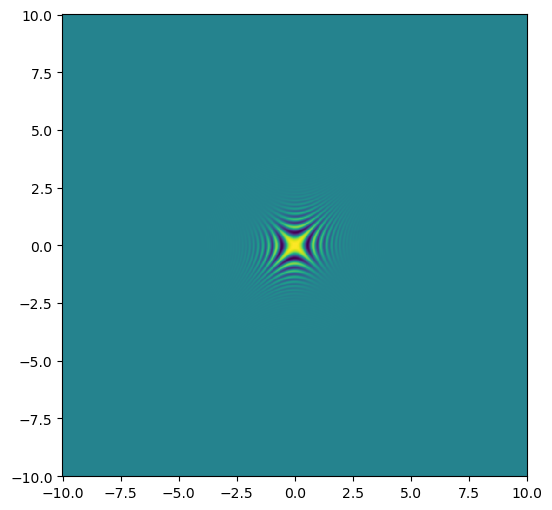

In [74]:
L = 1
m =1 
t = 20

k_grid,kp_grid = np.meshgrid(*2*[np.linspace(-10,10,1000)])
p = integrand_f(k_grid,kp_grid,L,m,t)
plt.figure(figsize=(6,6))
plt.pcolormesh(k_grid,kp_grid,p) 
# as you can see k is non -zero in a small range of k values (so we don't have to integrate from -inf,+inf)

This function computes the probability, by double integraing over the integrand function above. A few notes:

* In the integrand $t/m$ always shows up together. Therefore we can set $m=1$ when evaluating the probability numerically, and we get the proability as a function of $t/m$.

In [75]:
def compute_prob(t,L,lim=np.inf):
    return 0.5 * (1 - nquad(integrand_f,ranges=[[-lim,lim],[-lim,lim]],args=(L,m,t),opts={'limit':100})[0])

In [76]:
t = [0,1,2,3,5,8,11,15,20,30]
p = np.vectorize(compute_prob)(t, 5, lim=5)

Initially we found $t=\sqrt{2}Lam$, so lets add a line $t/m = \sqrt{2}L$

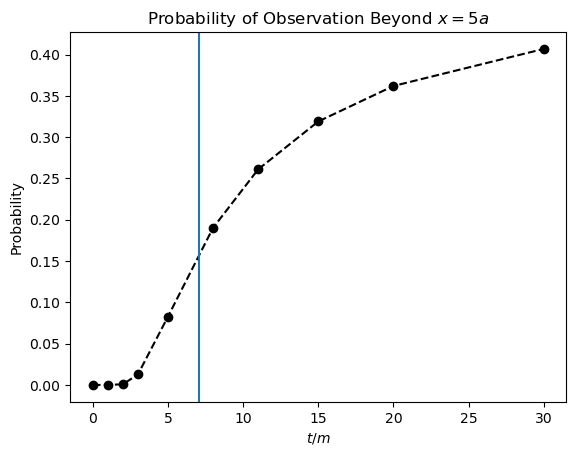

In [77]:
# plot 

plt.plot(t,p, 'ko--')
plt.axvline(5*np.sqrt(2))
plt.title('Probability of Observation Beyond $x=5a$')
plt.ylabel('Probability')
plt.xlabel('$t/m$')
plt.show()